In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from matplotlib import pyplot as plt
%matplotlib inline

# PROBLEM 1
## (A)

##### Optimal MSE = 0

## (B)

## (C) 

##### MSE for regularized best fit line = 0

## (D) 

##### The simplest best fit line is y(x) = 142, which is the same as the regularized best fit line.

# PROBLEM 2

## (A)

In [4]:
def PolyFeatures(features,degree=2,interaction_only=False):
    poly = PolynomialFeatures(degree,interaction_only=interaction_only)
    if features.ndim == 1:
        features_engineered = poly.fit_transform(features.values.reshape(-1,1))
        cols = poly.get_feature_names([features.name])
    else:
        features_engineered = poly.fit_transform(features)
        cols = poly.get_feature_names(features.columns)
    features_engineered = pd.DataFrame(features_engineered,columns=cols)
    print('features shape =',features.shape)
    print('features (engineered) shape =',features_engineered.shape)
    return features_engineered

In [7]:
df = pd.read_csv('./Concrete_train.csv')
print(df.shape)
df.head()

(700, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,233.81,0.0,94.58,197.89,4.567,947.04,852.16,28,22.835445
1,251.81,0.0,99.94,146.14,12.350,1006.00,899.76,56,44.140254
2,252.00,0.0,0.00,186.00,0.000,1111.00,784.00,7,11.465986
3,325.60,166.4,0.00,174.00,8.900,881.60,790.00,28,61.235811
4,250.00,0.0,95.69,191.84,5.330,948.90,857.20,14,24.655662


In [8]:
features = df.drop(df.columns[-1],axis=1)
features = (features - features.mean())/features.std()
target  = df.iloc[:,-1]
features_engineered = PolyFeatures(features,degree=4)

features shape = (700, 8)
features (engineered) shape = (700, 495)


In [9]:
grid = {'alpha':[0.01,0.1,1,10,100,1000,10000]}

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



best alpha = {'alpha': 1000}   test R2 = 0.6586277368718321


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


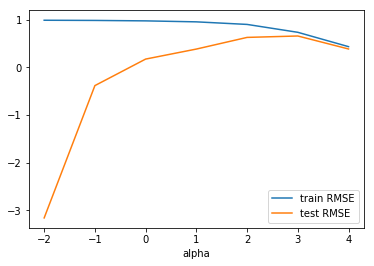

In [10]:
ridge = Ridge()
ridgeCV = GridSearchCV(ridge,param_grid=grid,return_train_score=True)
ridgeCV.fit(features_engineered,target)
print()
print('best alpha =',ridgeCV.best_params_, '  test R2 =',ridgeCV.best_score_)

performance = pd.DataFrame()
performance['alpha'] = np.log10(grid['alpha'])
performance['train RMSE'] = ridgeCV.cv_results_['mean_train_score']
performance['test RMSE']  = ridgeCV.cv_results_['mean_test_score']
ax1 = performance.plot.line(x='alpha',y='train RMSE')
performance.plot.line(x='alpha',y='test RMSE',ax=ax1)

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase


best alpha = {'alpha': 0.1}   test R2 = 0.7609375702731513


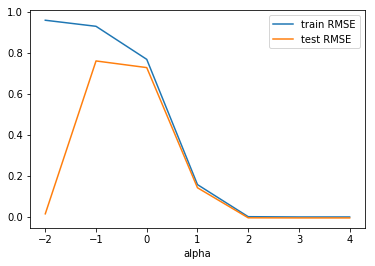

In [11]:
lasso = Lasso()
lassoCV = GridSearchCV(lasso,param_grid=grid,return_train_score=True)
lassoCV.fit(features_engineered,target)

print()
print('best alpha =',lassoCV.best_params_, '  test R2 =',lassoCV.best_score_)

performance = pd.DataFrame()
performance['alpha'] = np.log10(grid['alpha'])
performance['train RMSE'] = lassoCV.cv_results_['mean_train_score']
performance['test RMSE']  = lassoCV.cv_results_['mean_test_score']
ax1 = performance.plot.line(x='alpha',y='train RMSE')
performance.plot.line(x='alpha',y='test RMSE',ax=ax1)

##### Lasso is more accurate.

## (B)

(-0.1, 0.1)

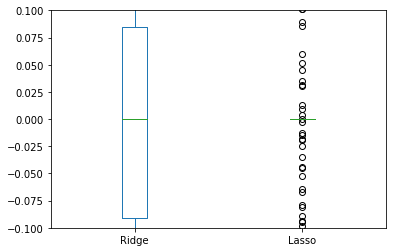

In [12]:
ridge = ridgeCV.best_estimator_
lasso = lassoCV.best_estimator_

coef = pd.DataFrame()
coef['Ridge'] = ridge.coef_
coef['Lasso'] = lasso.coef_

coef.plot.box()
plt.ylim(-0.1,0.1)

#### Lasso has a lot less non-zero coefficients than Ridge, so lasso is easier to read and more interpretable.